Student Details

Name: Cormac Lavery

ID: 16139658

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Sample code to plot SVM margin, 'gutters' and support vectors

In [2]:
dataset = pd.read_csv('dataset_1.csv', index_col=0)
# target attribute
target_attribute_name = '2'
y = dataset[target_attribute_name].values

# predictor attributes
X = dataset.drop(target_attribute_name, axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


tuned_parameters_c01 = [{'kernel': ['linear'], 'C': [.01]}]
tuned_parameters_c1 = [{'kernel': ['linear'], 'C': [1]}]
tuned_parameters_c10 = [{'kernel': ['linear'], 'C': [10]}]
tuned_parameters_c100 = [{'kernel': ['linear'], 'C': [100]}]
tuned_parameters_c1000 = [{'kernel': ['linear'], 'C': [1000]}]



clf_c01 = GridSearchCV(svm.SVC(), tuned_parameters_c01, scoring='accuracy')
clf_c1 = GridSearchCV(svm.SVC(), tuned_parameters_c1, scoring='accuracy')
clf_c10 = GridSearchCV(svm.SVC(), tuned_parameters_c10, scoring='accuracy')
clf_c100 = GridSearchCV(svm.SVC(), tuned_parameters_c100, scoring='accuracy')
clf_c1000 = GridSearchCV(svm.SVC(), tuned_parameters_c1000, scoring='accuracy')


clf_c01.fit(X_train, y_train)
clf_c1.fit(X_train, y_train)
clf_c10.fit(X_train, y_train)
clf_c100.fit(X_train, y_train)
clf_c1000.fit(X_train, y_train)


classifiers = [(clf_c01, 'C = .01'),
               (clf_c1, 'C = 1'),
               (clf_c10, 'C = 10'),
               (clf_c100, 'C = 100'),
               (clf_c1000, 'C = 1,000')]

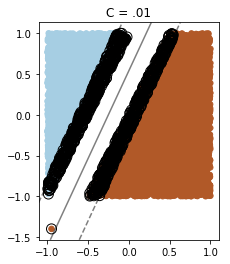

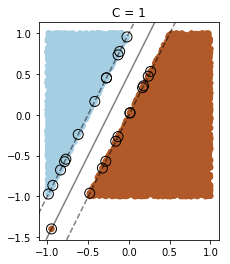

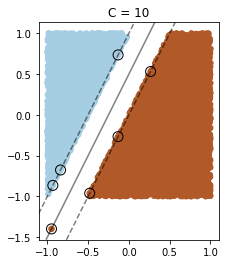

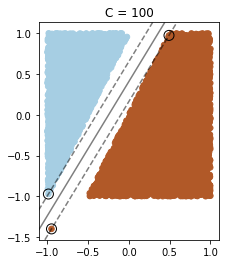

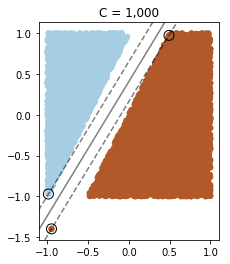

In [3]:
def display_classifier(classifier, title=None):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
    
for classifier in classifiers:
    display_classifier(classifier[0].best_estimator_, classifier[1])

Large Value of parameter C => small margin

Small Value of paramerter C => Large margin

As we can see from the two extremes the high value of C allows the single outlier brown point to significantly alter the model (At risk of overfitting) and the extremely low values of C run the risk of underfitting

In [10]:
dataset2 = pd.read_csv('dataset_2.csv', index_col=0)
# target attribute
target_attribute_name = '2'
y = dataset2[target_attribute_name].values

# predictor attributes
X = dataset2.drop(target_attribute_name, axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tuned_parameters = [{'kernel': ['linear','rbf','poly','sigmoid'],'C': [1, 10, 100], 'gamma': [0.001, 0.0001, "auto"]}]

clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 10, 100], 'gamma': [0.001, 0.0001, 'auto']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

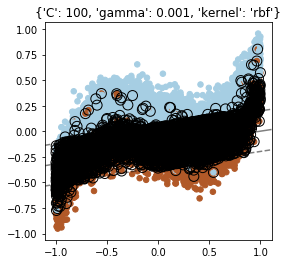

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.title(str(clf.best_params_))
# plot the decision function
ax = plt.gca()
ax.set_aspect(aspect=1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [11]:
dataset3 = pd.read_csv('dataset_3.csv', index_col=0)
# target attribute
target_attribute_name = '2'
y = dataset3[target_attribute_name].values

# predictor attributes
X = dataset3.drop(target_attribute_name, axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tuned_parameters = [{'kernel': ['rbf','poly','sigmoid'],'C': [1, 10, 100], 'gamma': [0.001, 0.0001, "auto"]}]

clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [1, 10, 100], 'gamma': [0.001, 0.0001, 'auto']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

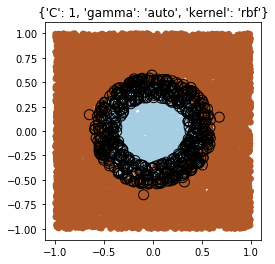

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.title(str(clf.best_params_))
# plot the decision function
ax = plt.gca()
ax.set_aspect(aspect=1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
plt.show()